# Notebook to explore satellite halos data selection

In [1]:
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import h5py

In [2]:
DATA_PATH = "../data/TangoSIDM/"

IDs = {
    "SigmaConstant00": "CDM",
    "SigmaConstant01": "SigmaConstant01",
    "SigmaConstant10": "SigmaConstant10",
    "SigmaVelDep20Anisotropic": "SigmaVel20",
    "SigmaVelDep60Anisotropic": "SigmaVel60", 
    "SigmaVelDep100Anisotropic": "SigmaVel100",
}

## Satellite statistic

In [3]:
for id, id_name in IDs.items():
    file = h5py.File(DATA_PATH+f"{id}.hdf5", "r")

    main, sub = 0, 0
    above, below = 0, 0
    for idd in file.keys():
        if file[idd].attrs.get('main_halo_of') is not None:
            main += 1
        elif file[idd].attrs.get('subhalo_of') is not None:
            sub += 1
            if np.log10(file[idd]['tree_data']['bound_mass_dm'][0]) < 9: # MINIMUM satellite mass = 10^9
                below += 1
            else:
                above += 1
                
    print(id)
    print('Total MW-type host halos:', main)
    print('Total satellite halos:', sub)
    print('satellite mass > 10^9:', above)
    print('satellite mass < 10^9:', below, "\n")
    file.close()

SigmaConstant00
Total MW-type host halos: 34
Total satellite halos: 680
satellite mass > 10^9: 430
satellite mass < 10^9: 250 

SigmaConstant01
Total MW-type host halos: 33
Total satellite halos: 660
satellite mass > 10^9: 414
satellite mass < 10^9: 246 

SigmaConstant10
Total MW-type host halos: 31
Total satellite halos: 620
satellite mass > 10^9: 329
satellite mass < 10^9: 291 

SigmaVelDep20Anisotropic
Total MW-type host halos: 33
Total satellite halos: 660
satellite mass > 10^9: 401
satellite mass < 10^9: 259 

SigmaVelDep60Anisotropic
Total MW-type host halos: 33
Total satellite halos: 660
satellite mass > 10^9: 403
satellite mass < 10^9: 257 

SigmaVelDep100Anisotropic
Total MW-type host halos: 33
Total satellite halos: 660
satellite mass > 10^9: 397
satellite mass < 10^9: 263 



In [4]:
# for id, id_name in IDs.items():
#     file = h5py.File(DATA_PATH+f"{id}.hdf5", "r")
    
#     print(id)
#     for idd in file.keys():        
#         if file[idd].attrs.get('main_halo_of') is not None:
#             print(idd)
#             subhalos_ids = file[idd].attrs.get('main_halo_of')
#             print(len(subhalos_ids))     
            
#             n = 0
#             for i in range(len(subhalos_ids)):
#                 if np.log10(file[str(subhalos_ids[i])]['tree_data']['M200c'][0]) > 9:
#                     n += 1     
#             print(n, "above 10^9 \n")
        
#     file.close()

## Satellite bound mass at $z=0$.

CDM: 9.419568281810898 M_sun
SigmaConstant01: 9.38457372782227 M_sun
SigmaConstant10: 9.4064297500037 M_sun
SigmaVel20: 9.365893600180826 M_sun
SigmaVel60: 9.345523696449042 M_sun
SigmaVel100: 9.388935700419239 M_sun


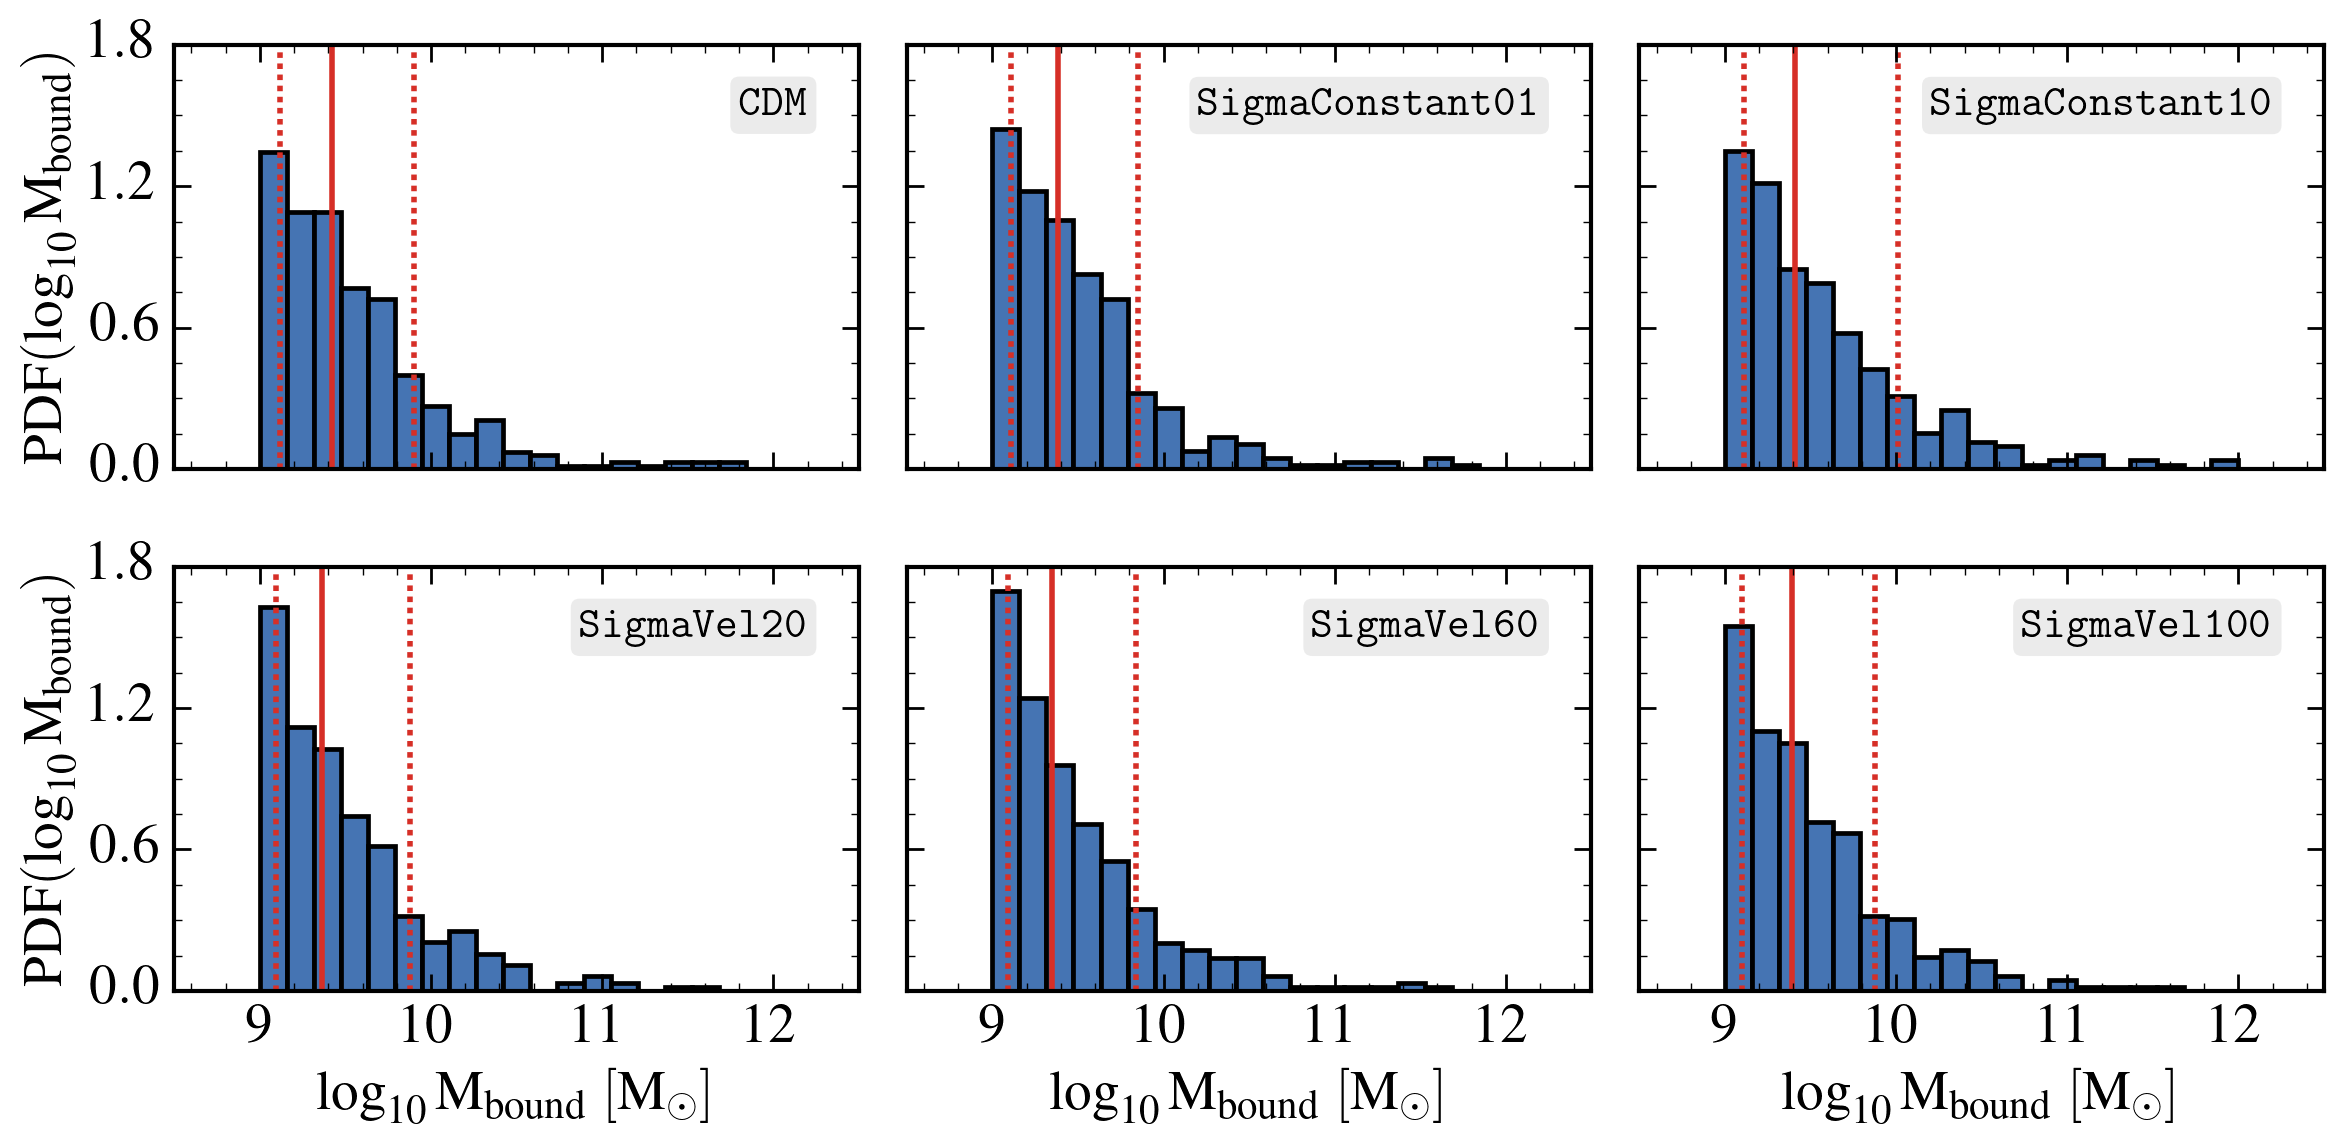

In [5]:
mycmap = matplotlib.cm.RdYlBu
myred = mycmap(0.1)
myblue =  mycmap(0.9)

plt.style.use("pltstyle.mplstyle")

fig, axs = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12, 6), dpi=200, facecolor='white')
axs = axs.flatten()

for i, (id, id_name) in enumerate(IDs.items()):
    file = h5py.File(DATA_PATH+f"{id}.hdf5", "r")

    mass = []
    for idx in file.keys():
        if file[f'{idx}'].attrs.get('subhalo_of') is not None:
            if np.log10(file[str(idx)]['tree_data']['bound_mass_dm'][0]) > 9: # MINIMUM satellite mass = 10^9
                data_subhalo = file[f'{idx}']
                m = data_subhalo['tree_data']['bound_mass_dm'][0]
                mass.append(np.log10(m))
    
    mass = np.asarray(mass)

    axs[i].hist(mass, bins=np.linspace(9, 12, 20), density=True, histtype='bar', color=myblue)
    axs[i].axvline(np.median(mass), c=myred, lw=2)
    axs[i].axvline(np.percentile(mass, 16), c=myred, lw=2, ls=(0, (1, 1)))
    axs[i].axvline(np.percentile(mass, 84), c=myred, lw=2, ls=(0, (1, 1)))
    axs[i].set_yticks([0, 0.6, 1.2, 1.8])
    axs[i].set_xlim(8.5, 12.5)
    axs[i].set_xticks([9, 10, 11, 12])
    axs[i].text(12.2, 1.5,  fr'$\texttt{{{id_name}}}$', color='k', 
            bbox=dict(facecolor='silver', edgecolor='none', alpha=0.3, boxstyle='round, pad=0.2'), horizontalalignment='right')

    print(f"{id_name}:", f"{np.median(mass)} M_sun")
    
axs[0].set_ylabel(r'$\mathrm{PDF}(\log_{10}\mathrm{M_{bound}})$')
axs[3].set_ylabel(r'$\mathrm{PDF}(\log_{10}\mathrm{M_{bound}})$')
axs[3].set_xlabel(r'$\log_{10}\mathrm{M_{bound}}$ $\mathrm{[M_\odot]}$')
axs[4].set_xlabel(r'$\log_{10}\mathrm{M_{bound}}$ $\mathrm{[M_\odot]}$')
axs[5].set_xlabel(r'$\log_{10}\mathrm{M_{bound}}$ $\mathrm{[M_\odot]}$')

plt.tight_layout()
plt.show()
fig.savefig("./figures/hist_mbound.png", dpi=300, transparent=True)

## Satellite peak mass

CDM: 9.57093682702896 M_sun
SigmaConstant01: 9.544665737068877 M_sun
SigmaConstant10: 9.590690398485306 M_sun
SigmaVel20: 9.53520949553303 M_sun
SigmaVel60: 9.525635829258482 M_sun
SigmaVel100: 9.549538038400582 M_sun


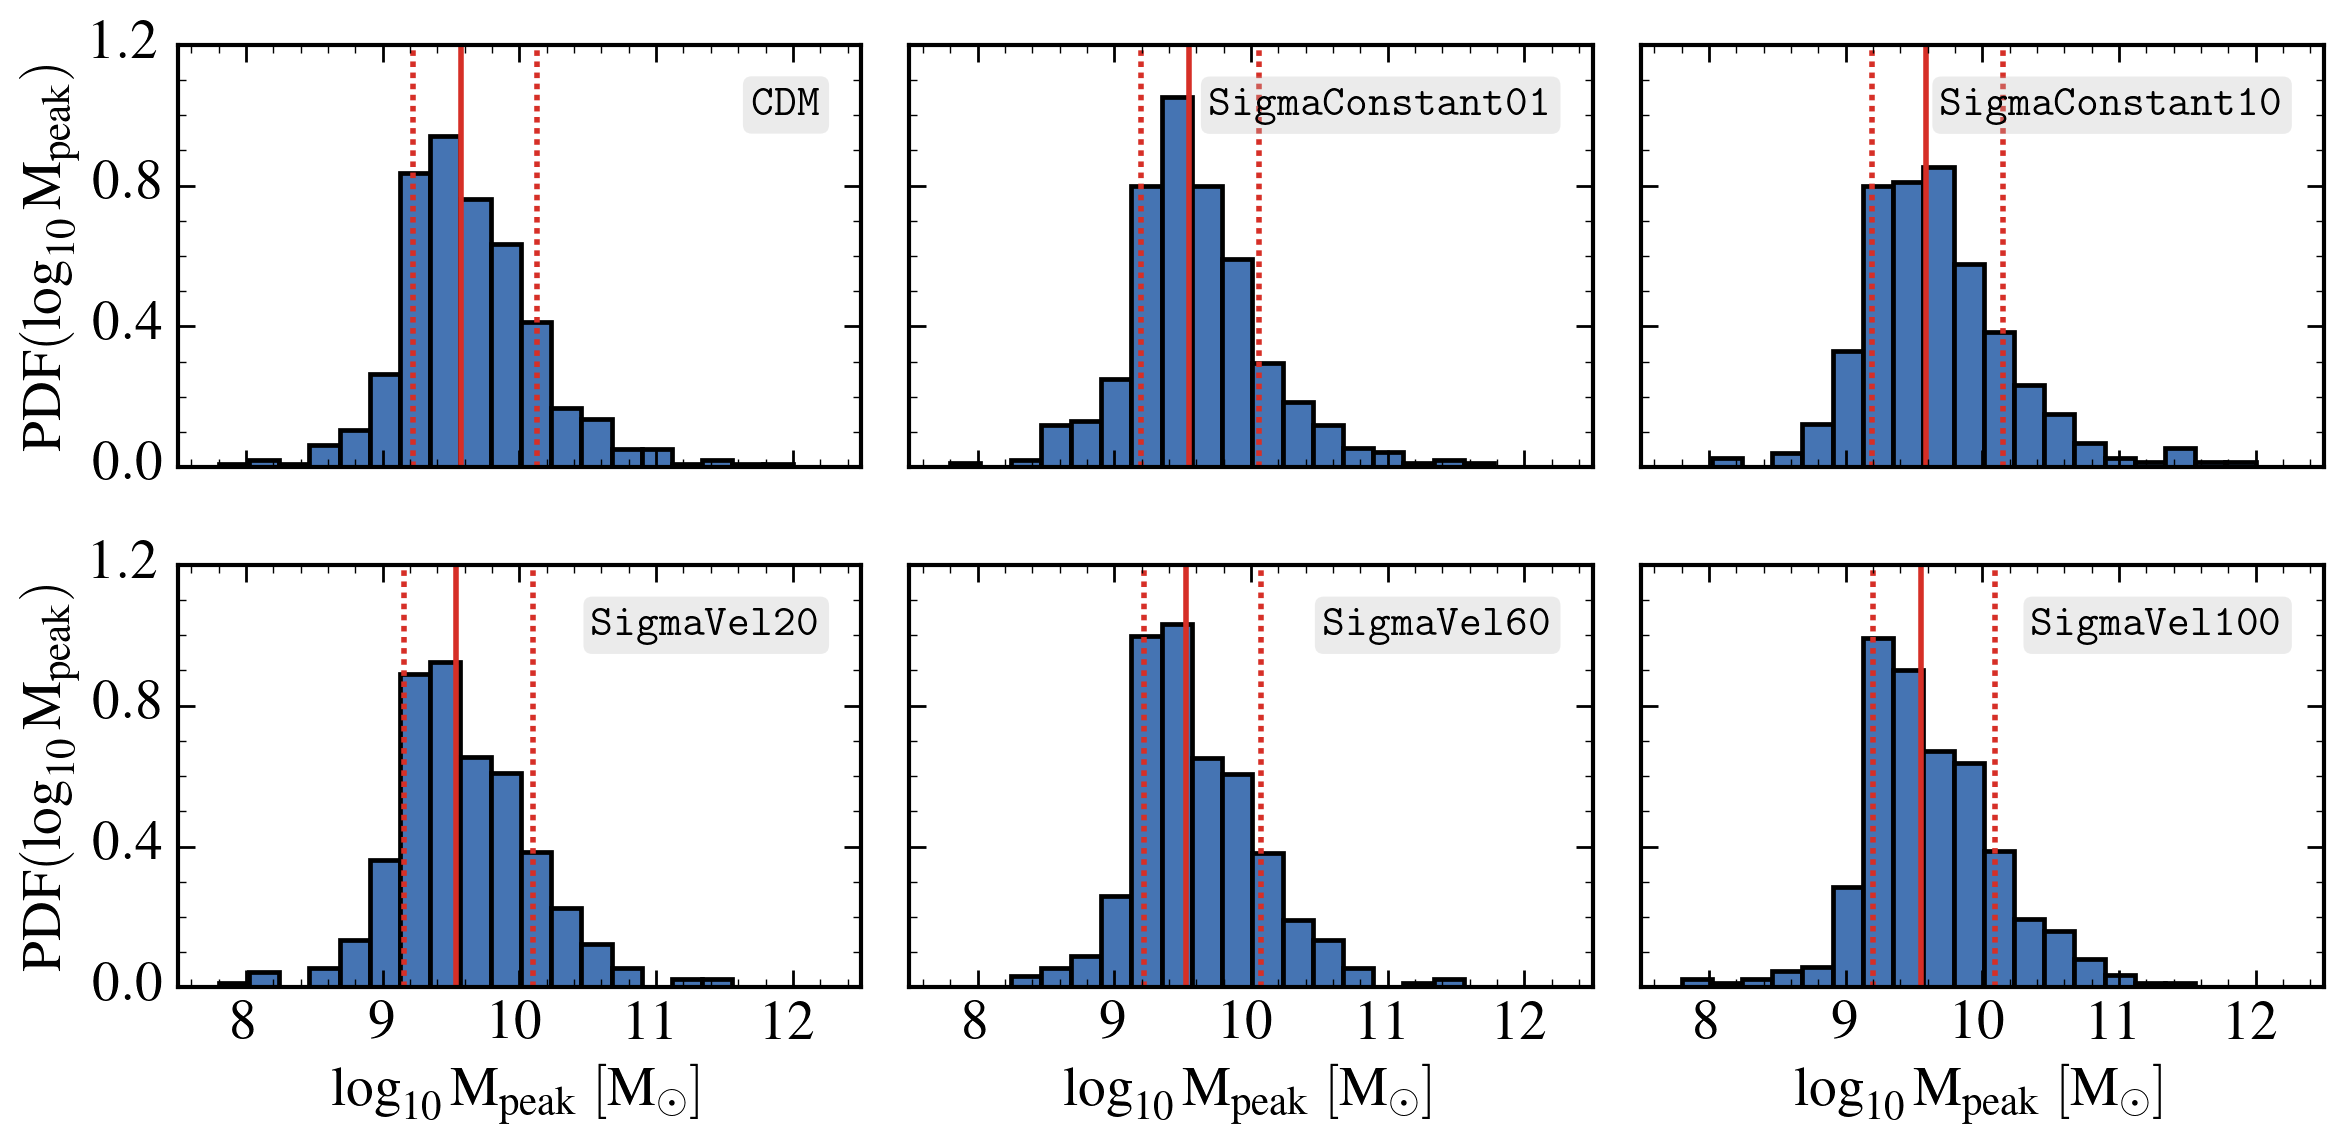

In [6]:
mycmap = matplotlib.cm.RdYlBu
myred = mycmap(0.1)
myblue =  mycmap(0.9)

plt.style.use("pltstyle.mplstyle")

fig, axs = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12, 6), dpi=200, facecolor='white')
axs = axs.flatten()

for i, (id, id_name) in enumerate(IDs.items()):
    file = h5py.File(DATA_PATH+f"{id}.hdf5", "r")

    mass = []
    for idx in file.keys():
        if file[f'{idx}'].attrs.get('subhalo_of') is not None:
            if np.log10(file[str(idx)]['tree_data']['bound_mass_dm'][0]) > 9: # MINIMUM satellite mass = 10^9
                data_subhalo = file[f'{idx}']
                z_accr_type_idx, accretion = data_subhalo['tree_data']['accretion']
                m = data_subhalo['tree_data']['bound_mass_dm'][int(z_accr_type_idx)]
                mass.append(np.log10(m))
    
    mass = np.asarray(mass)
    
    axs[i].hist(mass, bins=np.linspace(7.8, 12, 20), density=True, histtype='bar', color=myblue)
    axs[i].axvline(np.median(mass), c=myred, lw=2)
    axs[i].axvline(np.percentile(mass, 16), c=myred, lw=2, ls=(0, (1, 1)))
    axs[i].axvline(np.percentile(mass, 84), c=myred, lw=2, ls=(0, (1, 1)))
    axs[i].set_yticks([0, 0.4, 0.8, 1.2])
    axs[i].set_xlim(7.5, 12.5)
    axs[i].set_xticks([8, 9, 10, 11, 12])
    axs[i].text(12.2, 1.,  fr'$\texttt{{{id_name}}}$', color='k', 
            bbox=dict(facecolor='silver', edgecolor='none', alpha=0.3, boxstyle='round, pad=0.2'), horizontalalignment='right')

    print(f"{id_name}:", f"{np.median(mass)} M_sun")
    
axs[0].set_ylabel(r'$\mathrm{PDF}(\log_{10}\mathrm{M_{peak}})$')
axs[3].set_ylabel(r'$\mathrm{PDF}(\log_{10}\mathrm{M_{peak}})$')
axs[3].set_xlabel(r'$\log_{10}\mathrm{M_{peak}}$ $\mathrm{[M_\odot]}$')
axs[4].set_xlabel(r'$\log_{10}\mathrm{M_{peak}}$ $\mathrm{[M_\odot]}$')
axs[5].set_xlabel(r'$\log_{10}\mathrm{M_{peak}}$ $\mathrm{[M_\odot]}$')

plt.tight_layout()
plt.show()
fig.savefig("./figures/hist_mpeak.png", dpi=300, transparent=True)

## Satellite pericenters

Median pericenter for CDM: 105.68032283416244 kpc
Median pericenter for SigmaConstant01: 96.72098017870022 kpc
Median pericenter for SigmaConstant10: 126.7031576792829 kpc
Median pericenter for SigmaVel20: 90.12457141102627 kpc
Median pericenter for SigmaVel60: 91.15441640878916 kpc
Median pericenter for SigmaVel100: 94.93056037165377 kpc


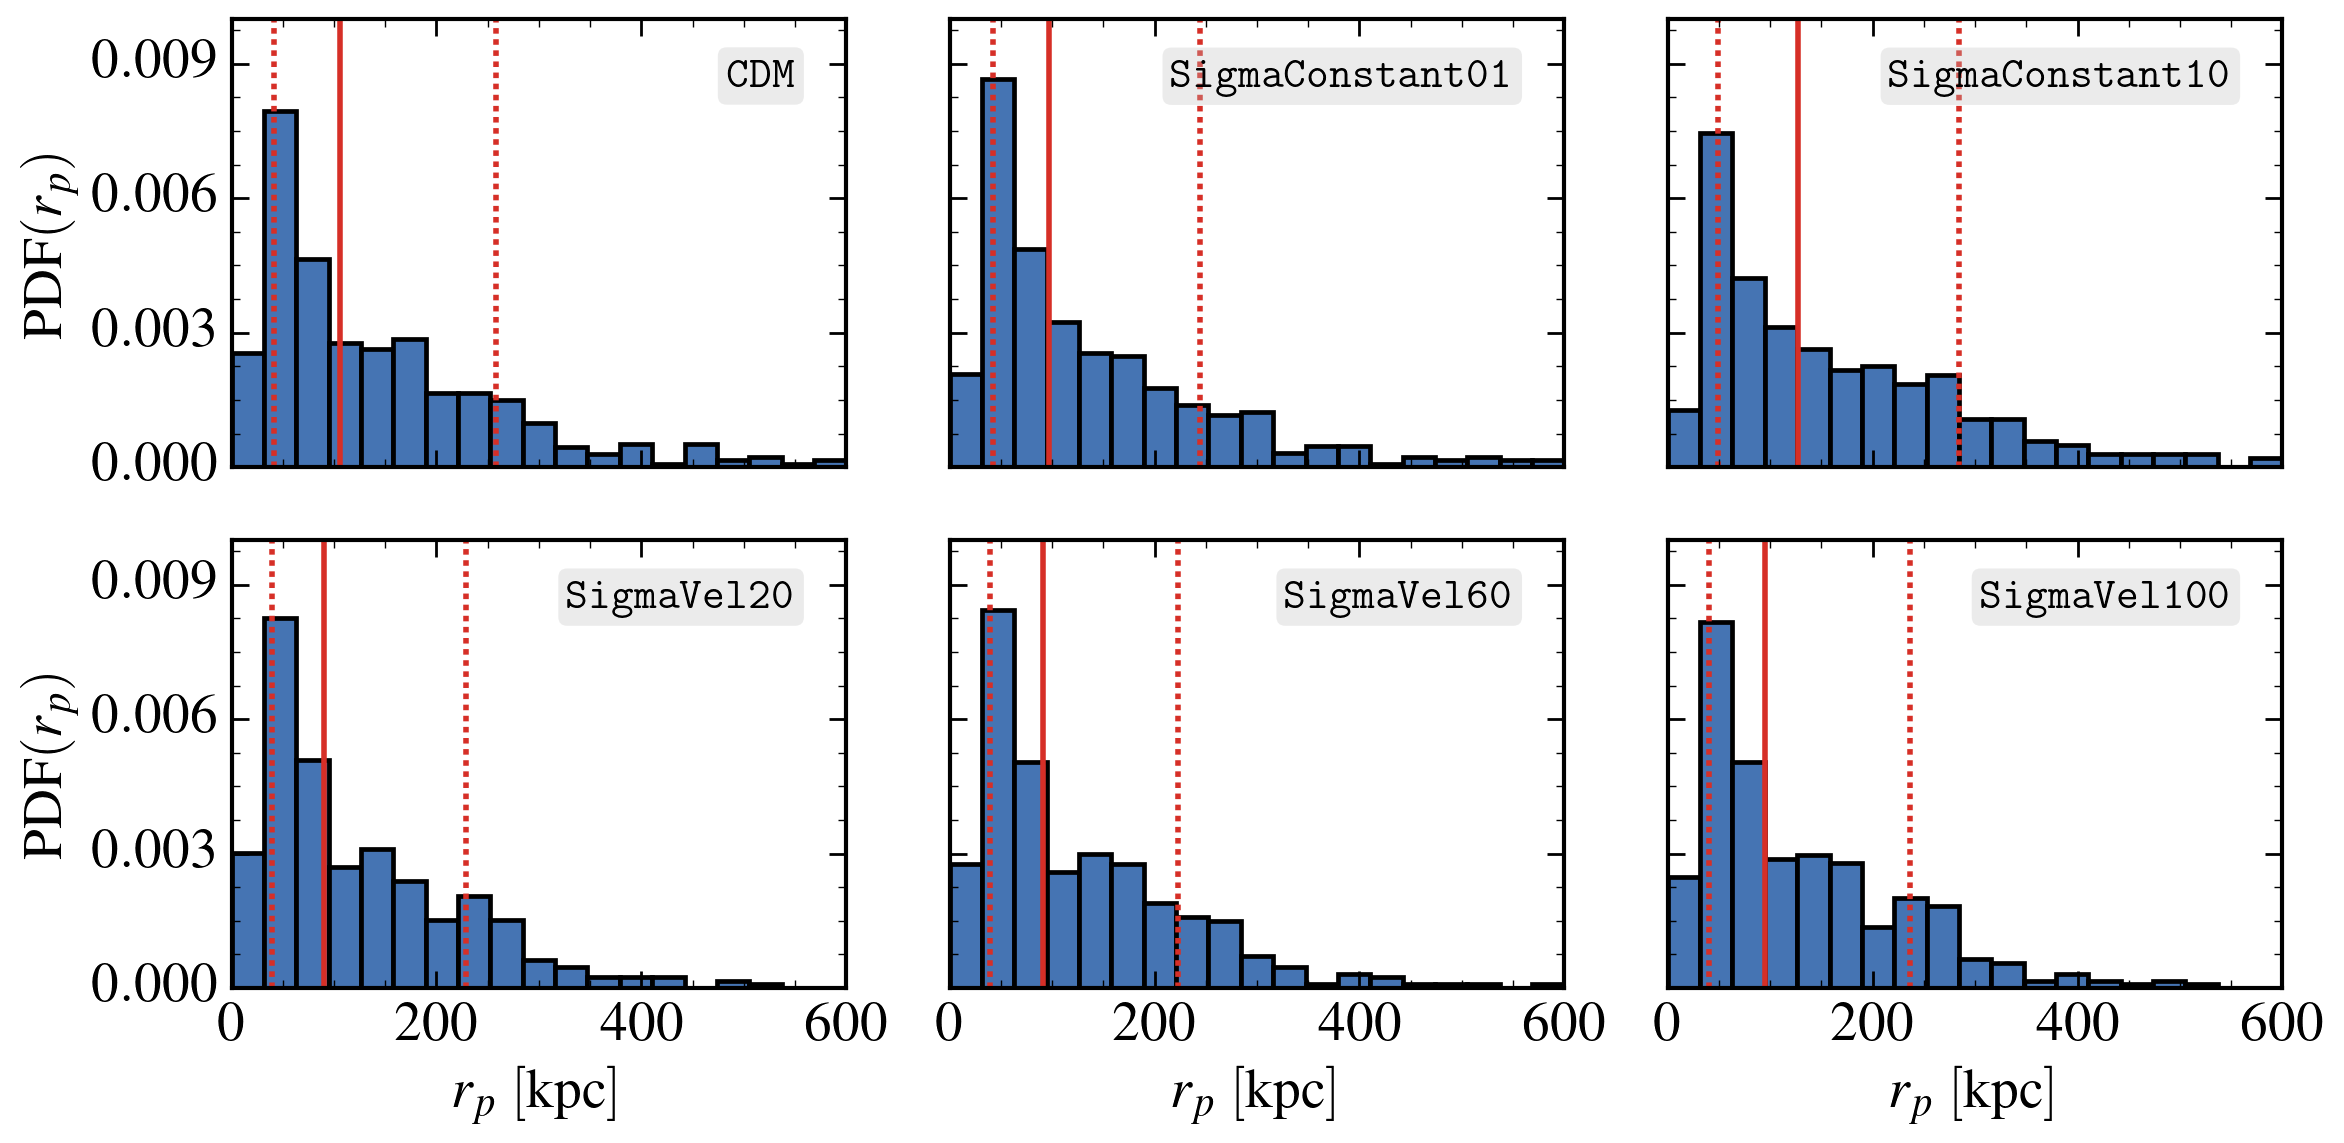

In [7]:
mycmap = matplotlib.cm.RdYlBu
myred = mycmap(0.1)
myblue =  mycmap(0.9)

plt.style.use("pltstyle.mplstyle")

fig, axs = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12, 6), dpi=200, facecolor='white')
axs = axs.flatten()

for i, (id, id_name) in enumerate(IDs.items()):
    file = h5py.File(DATA_PATH+f"{id}.hdf5", "r")
    
    pericenters = []
    for idx in file.keys():
        if file[f'{idx}'].attrs.get('subhalo_of') is not None:
            if np.log10(file[str(idx)]['tree_data']['bound_mass_dm'][0]) > 9: # MINIMUM satellite mass = 10^9
                data_subhalo = file[f'{idx}']
                pericenter = data_subhalo['tree_data']['pericenter'][1]
                p = pericenter[0] if pericenter.shape==(1,) else pericenter
                pericenters.append(p)
    
    pericenters = np.asarray(pericenters)
    
    axs[i].hist(pericenters, bins=np.linspace(0, 600, 20), density=True, histtype='bar', color=myblue)
    axs[i].axvline(np.median(pericenters), c=myred, lw=2)
    axs[i].axvline(np.percentile(pericenters, 16), c=myred, lw=2, ls=(0, (1, 1)))
    axs[i].axvline(np.percentile(pericenters, 84), c=myred, lw=2, ls=(0, (1, 1)))
    axs[i].set_yticks([0, 0.003, 0.006, 0.009])
    axs[i].set_xticks([0, 200, 400, 600])
    axs[i].set_ylim(0, 0.01)
    axs[i].text(550, 0.0085,  fr'$\texttt{{{id_name}}}$', color='k', 
            bbox=dict(facecolor='silver', edgecolor='none', alpha=0.3, boxstyle='round, pad=0.2'), horizontalalignment='right')

    print(f"Median pericenter for {id_name}:", f"{np.median(pericenters)} kpc")
    
axs[0].set_ylabel(r'$\mathrm{PDF}(r_{{p}})$')
axs[3].set_ylabel(r'$\mathrm{PDF}(r_{{p}})$')
axs[3].set_xlabel(r'$r_{{p}}\ [\mathrm{kpc}]$')
axs[4].set_xlabel(r'$r_{{p}}\ [\mathrm{kpc}]$')
axs[5].set_xlabel(r'$r_{{p}}\ [\mathrm{kpc}]$')

plt.tight_layout()
plt.show()
fig.savefig("./figures/hist_pericenter.png", dpi=300, transparent=True)